**YZV 202E - Project - Plan for Efficient Firefighting in Izmir**

Project Members:

Aybike Battal - 150200343

Ilayda Kara - 150220747

Nazrin Abdinli - 150220925

In [61]:
# Libraries
import random
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import math

**Part 1 - Data Preparation**

In [62]:
# Replace with your API URL
api_url = "https://openapi.izmir.bel.tr/api/ibb/cbs/itfaiyegruplari"

# Fetch the data from the API
response = requests.get(api_url)
response.raise_for_status()  # This will raise an error for bad status codes

# Assuming the API returns a JSON object
data = response.json()

# Convert the JSON data to a pandas DataFrame
# If the JSON data is a list of dictionaries, you can directly create a DataFrame
df = pd.DataFrame(data)
df_dict = df['onemliyer']
dict_list = df['onemliyer'].tolist()
df_itfaiye_gruplari = pd.DataFrame(dict_list)
df_itfaiye_gruplari


,ILCE,KAPINO,ENLEM,ACIKLAMA,ILCEID,MAHALLE,MAHALLEID,ADI,BOYLAM,YOL
0,BERGAMA,,39.253723,+90(232) 293 89 12,999,YUKARIBEY,None,Bergama Yukarıbey İtfaiye İstasyonu,27.090147,KOCA
1,TORBALI,2,38.130210,,9,ÇAYBAŞI,None,Çaybaşı İtfaiye İstasyonu,27.385091,7135
2,DİKİLİ,10,39.077939,,995,İSMETPAŞA,None,Dikili İtfaiye İstasyonu,26.896778,SANAYİ
3,ÖDEMİŞ,,38.321971,Sadece Yaz Mevsiminde Bulunmaktadır.,998,GÖLCÜK,None,Gölcük İtfaiye Bekleme Noktası,28.025814,MEHMET SELİM KİRAZ
4,BUCA,50,38.405922,,8,AYDOĞDU,None,IBB İtfaiye Arama Kurtarma Ve Afet İşleri Şube...,27.192052,Sokak Seçiniz
...,...,...,...,...,...,...,...,...,...,...
72,KARABURUN,,38.557367,,1000,KÜÇÜKBAHÇE,None,Küçükbahçe İtfaiye Bekleme Noktası,26.371143,KÜÇÜKBAHÇE DENİZGİREN
73,MENDERES,2,37.994048,,13,AHMETBEYLİ,None,Menderes Ahmetbeyli İtfaiye Bekleme Noktası,27.188342,AHMETBEYLİ SAHİL
74,KONAK,9/1,38.425273,,21,MİMAR SİNAN,None,Sivil Savunma Hizmetleri Birimi,27.146723,9 EYLÜL
75,URLA,3/45-46,38.324374,,18,HACI İSA,None,Urla İtfaiye Denetim ve Önleme Bölge Birimi,26.766465,NECATİ CUMALI


In [63]:
df_ilce_counts = df_itfaiye_gruplari.groupby('ILCE').size().reset_index(name='ITFAIYE_GRUP_SAYISI')
df_ilce_counts

,ILCE,ITFAIYE_GRUP_SAYISI
0,ALİAĞA,2
1,BALÇOVA,2
2,BAYINDIR,1
3,BAYRAKLI,3
4,BERGAMA,2
5,BEYDAĞ,1
6,BORNOVA,4
7,BUCA,8
8,DİKİLİ,2
9,FOÇA,2


In [64]:
file_path = '2023-yili-yangin-mudahale-istatistigi.csv'

# Read Excel file into DataFrame
df = pd.read_csv(file_path)
selected_columns = ['ILCE','YANGIN_SONUCU', 'VARIS_SURESI (DAK.)', 'KULLANILAN_KOPUK_MIKTARI (KG)', 'KULLANILAN_SU_MIKTARI (m3)', 'KULLANILAN_KURU_KIMYEVI_TOZ_MIKTARI (KG)']
df_yangin_istatistigi = df[selected_columns]

def time_to_minutes(time_str):
    if isinstance(time_str, str):
        if ':' in time_str:
            hours, minutes = time_str.split(':')
            return int(hours) * 60 + int(minutes) 
        else:
            # If ':' is not present, assume the format is minutes only
            return int(time_str) 
    else:
        # If the value is not a string, return the value unchanged
        return time_str


df_yangin_istatistigi['VARIS_SURESI (DAK.)'] = df_yangin_istatistigi['VARIS_SURESI (DAK.)'].apply(time_to_minutes)

df_yangin_istatistigi

<ipython-input-64-73675a26968b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yangin_istatistigi['VARIS_SURESI (DAK.)'] = df_yangin_istatistigi['VARIS_SURESI (DAK.)'].apply(time_to_minutes)


,ILCE,YANGIN_SONUCU,VARIS_SURESI (DAK.),KULLANILAN_KOPUK_MIKTARI (KG),KULLANILAN_SU_MIKTARI (m3),KULLANILAN_KURU_KIMYEVI_TOZ_MIKTARI (KG)
0,KARABAĞLAR,BAŞLANGIÇTA SÖNDÜRÜLEN,4.0,0.0,1.0,0.0
1,KONAK,BAŞLANGIÇTA SÖNDÜRÜLEN,3.0,0.0,0.5,0.0
2,KONAK,BAŞLANGIÇTA SÖNDÜRÜLEN,2.0,0.0,0.0,0.0
3,BORNOVA,KISMEN YANARAK KURTARILAN,4.0,0.0,2.0,0.0
4,URLA,BAŞLANGIÇTA SÖNDÜRÜLEN,6.0,0.0,0.4,0.0
...,...,...,...,...,...,...
12981,BORNOVA,BAŞLANGIÇTA SÖNDÜRÜLEN,5.0,0.0,0.2,0.0
12982,URLA,BAŞLANGIÇTA SÖNDÜRÜLEN,13.0,0.0,0.0,0.0
12983,KARABAĞLAR,BAŞLANGIÇTA SÖNDÜRÜLEN,3.0,0.0,5.0,0.0
12984,SEFERİHİSAR,BAŞLANGIÇTA SÖNDÜRÜLEN,5.0,0.0,0.0,6.0


In [65]:
df_average_varis_suresi = df_yangin_istatistigi.groupby('ILCE')['VARIS_SURESI (DAK.)'].mean().reset_index()
df_average_varis_suresi.columns = ['ILCE', 'ORTALAMA_VARIS_SURELERI']

df_average_varis_suresi

,ILCE,ORTALAMA_VARIS_SURELERI
0,ALİAĞA,6.305623
1,BALÇOVA,3.880282
2,BAYINDIR,9.807560
3,BAYRAKLI,4.497696
4,BERGAMA,7.044118
5,BEYDAĞ,10.340909
6,BORNOVA,4.294849
7,BUCA,4.367761
8,DİKİLİ,7.110169
9,FOÇA,5.467811


In [66]:
average_varis_suresi_all = df_average_varis_suresi['ORTALAMA_VARIS_SURELERI'].mean()
print("The average arrival time is: ", average_varis_suresi_all)

The average arrival time is:  8.444986070098881


*The districts that have larger arrival time than average arrival time need more number of fire stations.*

In [67]:
df_filter_average_varis_suresi = df_average_varis_suresi[df_average_varis_suresi['ORTALAMA_VARIS_SURELERI'] > average_varis_suresi_all]
df_filter_average_varis_suresi

,ILCE,ORTALAMA_VARIS_SURELERI
2,BAYINDIR,9.807560
5,BEYDAĞ,10.340909
13,KARABURUN,9.805556
18,KİRAZ,13.106383
30,İL DIŞI,66.833333


In [68]:
df_yangin_sayisi = df_yangin_istatistigi.groupby('ILCE').size().reset_index(name='YANGİN_SAYİSİ')
df_yangin_sayisi

,ILCE,YANGİN_SAYİSİ
0,ALİAĞA,411
1,BALÇOVA,142
2,BAYINDIR,291
3,BAYRAKLI,434
4,BERGAMA,612
5,BEYDAĞ,44
6,BORNOVA,1126
7,BUCA,1038
8,DİKİLİ,354
9,FOÇA,233


In [69]:
data_merged = pd.merge(df_ilce_counts, df_yangin_sayisi, on='ILCE', how='inner')
data_merged = pd.merge(data_merged, df_average_varis_suresi, on='ILCE', how='inner')
data_merged

,ILCE,ITFAIYE_GRUP_SAYISI,YANGİN_SAYİSİ,ORTALAMA_VARIS_SURELERI
0,ALİAĞA,2,411,6.305623
1,BALÇOVA,2,142,3.880282
2,BAYINDIR,1,291,9.807560
3,BAYRAKLI,3,434,4.497696
4,BERGAMA,2,612,7.044118
5,BEYDAĞ,1,44,10.340909
6,BORNOVA,4,1126,4.294849
7,BUCA,8,1038,4.367761
8,DİKİLİ,2,354,7.110169
9,FOÇA,2,233,5.467811


**Part 2 - Objective Function and Simulated Annealing**

In [70]:
# Input data
districts = data_merged['ILCE'].tolist()

fires = np.array(data_merged['YANGİN_SAYİSİ'].tolist())

current_stations = np.array(data_merged['ITFAIYE_GRUP_SAYISI'].tolist())

arrival_times = np.array(data_merged['ORTALAMA_VARIS_SURELERI'].tolist())

# Number of districts
N = len(districts)

# Calculate k_i constants
k = arrival_times * current_stations

# Define the total number of stations and budget for additional stations
total_stations = np.sum(current_stations)
budget = 5  # Example budget: number of additional fire stations
max_stations = total_stations + budget

# Objective Function: Minimize weighted average response time
def calculate_total_response_time(fire_stations, total_incidents):
    total_time = 0
    for stations, incidents, ki in zip(fire_stations, total_incidents, k):
        if stations == 0:
            continue
        response_time = ki / stations
        total_time += response_time * incidents
    return total_time

    
# Simulated Annealing for Optimization
def optimize_fire_stations(fire_stations, total_incidents, iterations=1000, temp=1000, cooling_rate=0.003):
    current_stations = fire_stations[:]
    current_cost = calculate_total_response_time(current_stations, total_incidents)
    best_stations = current_stations[:]
    best_cost = current_cost
    
    for i in range(iterations):
        new_stations = current_stations[:]
        # Randomly choose two districts to swap fire stations
        d1, d2 = random.sample(range(len(districts)), 2)
        if new_stations[d1] > 1:  # Ensure we don't have 0 fire stations
            new_stations[d1] -= 1
            new_stations[d2] += 1
            
        new_cost = calculate_total_response_time(new_stations, total_incidents)
        # Acceptance probability
        if new_cost < current_cost or random.uniform(0, 1) < math.exp((current_cost - new_cost) / temp):
            current_stations = new_stations[:]
            current_cost = new_cost
            
            if current_cost < best_cost:
                best_stations = current_stations[:]
                best_cost = current_cost
        
        # Cool down
        temp *= (1 - cooling_rate)
        
    return best_stations, best_cost

# Running the optimization
optimized_stations, optimized_cost = optimize_fire_stations(current_stations, fires)

# Calculate best fitness
best_fitness = optimized_cost/np.sum(fires)

print("Optimized Fire Stations Allocation:", optimized_stations)
print("Best fitness is:", best_fitness)



Optimized Fire Stations Allocation: [1 6 2 4 3 1 3 2 2 8 2 5 1 3 1 2 3 1 6 2 1 1 2 1 6 4 1 1 2]
Best fitness is: 5.892030920238684


**Part 3 - Genetic Algorithm**

In [71]:
# Input data
districts = data_merged['ILCE'].tolist()

fires = np.array(data_merged['YANGİN_SAYİSİ'].tolist())

current_stations = np.array(data_merged['ITFAIYE_GRUP_SAYISI'].tolist())

arrival_times = np.array(data_merged['ORTALAMA_VARIS_SURELERI'].tolist())

# Number of districts
N = len(districts)

# Calculate k_i constants
k = arrival_times * current_stations

# Define the total number of stations and budget for additional stations
total_stations = np.sum(current_stations)
budget = 5  # Example budget: number of additional fire stations
max_stations = total_stations + budget

# Objective Function: Minimize weighted average response time
def calculate_fitness(chromosome):
    weighted_sum = np.sum(fires * (k / chromosome))
    return weighted_sum / np.sum(fires)

# Create initial population
def create_individual():
    individual = np.copy(current_stations)
    while np.sum(individual) < max_stations:
        i = random.randint(0, N-1)
        individual[i] += 1
    while np.sum(individual) > max_stations:
        i = random.randint(0, N-1)
        if individual[i] > 1:
            individual[i] -= 1
    return individual

def create_population(pop_size):
    return [create_individual() for _ in range(pop_size)]

# Selection: Tournament selection
def tournament_selection(population, fitnesses, k=3):
    selected = []
    for _ in range(len(population)):
        aspirants = random.sample(range(len(population)), k)
        selected.append(min(aspirants, key=lambda x: fitnesses[x]))
    return [population[i] for i in selected]

# Crossover: Two-point crossover
def crossover(parent1, parent2):
    if random.random() < cxpb:
        point1, point2 = sorted(random.sample(range(N), 2))
        child1 = np.concatenate((parent1[:point1], parent2[point1:point2], parent1[point2:]))
        child2 = np.concatenate((parent2[:point1], parent1[point1:point2], parent2[point2:]))
        return child1, child2
    return parent1, parent2

# Mutation: Uniform mutation
def mutate(individual):
    for i in range(N):
        if random.random() < mutpb:
            individual[i] = random.randint(1, 5)
    return individual

# Genetic Algorithm parameters
population_size = 100
num_generations = 50
cxpb = 0.5  # Crossover probability
mutpb = 0.2  # Mutation probability

# Create initial population
population = create_population(population_size)

# Run the genetic algorithm
for gen in range(num_generations):
    fitnesses = [calculate_fitness(ind) for ind in population]

    # Select individuals for the next generation
    selected = tournament_selection(population, fitnesses)
    next_population = []

    # Apply crossover and mutation to create the next generation
    for i in range(0, population_size, 2):
        parent1, parent2 = selected[i], selected[i+1]
        child1, child2 = crossover(parent1, parent2)
        next_population.append(mutate(child1))
        next_population.append(mutate(child2))

    # Ensure all individuals are valid
    for i in range(len(next_population)):
        while np.sum(next_population[i]) > max_stations:
            j = random.randint(0, N-1)
            if next_population[i][j] > 1:
                next_population[i][j] -= 1
        while np.sum(next_population[i]) < total_stations:
            j = random.randint(0, N-1)
            next_population[i][j] += 1

    population = next_population

# Get the best individual
fitnesses = [calculate_fitness(ind) for ind in population]
best_individual = population[np.argmin(fitnesses)]
best_fitness = min(fitnesses)

print("Best individual is:", best_individual)
print("Best fitness is:", best_fitness)



Best individual is: [2 5 2 3 4 1 5 4 4 3 1 2 2 2 3 1 5 2 2 5 2 1 2 5 3 4 3 1 2]
Best fitness is: 6.531023660351424


**Part 4 - Particle Swarm Optimization**

In [72]:
# Input data
districts = data_merged['ILCE'].tolist()

fires = np.array(data_merged['YANGİN_SAYİSİ'].tolist())

current_stations = np.array(data_merged['ITFAIYE_GRUP_SAYISI'].tolist())

arrival_times = np.array(data_merged['ORTALAMA_VARIS_SURELERI'].tolist())

# Number of districts
N = len(districts)

# Calculate k_i constants
k = arrival_times * current_stations

# Define the total number of stations and budget for additional stations
total_stations = np.sum(current_stations)
budget = 5  # Example budget: number of additional fire stations
max_stations = total_stations + budget

# Objective Function: Minimize weighted average response time
def calculate_fitness(chromosome):
    weighted_sum = np.sum(fires * (k / chromosome))
    return weighted_sum / np.sum(fires)

# Define PSO parameters
swarmsize = 100
maxiter = 50
c1 = 2.0
c2 = 2.0
w = 0.7

# Define bounds for each dimension (each district)
lb = np.array([1] * N)  # Lower bounds (minimum 1 fire station per district)
ub = np.array([5] * N)  # Upper bounds (maximum 5 fire stations per district)

# Initialize particles and velocities
particles = np.random.uniform(lb, ub, size=(swarmsize, N)).astype(int)
velocities = np.zeros_like(particles)
pbest = particles.copy()
pbest_fitness = np.array([calculate_fitness(p) for p in particles])
gbest = particles[np.argmin(pbest_fitness)].copy()
gbest_fitness = np.min(pbest_fitness)

# Ensure valid initial particles
def ensure_valid(particle):
    while np.sum(particle) < total_stations:
        i = random.randint(0, N-1)
        if particle[i] < ub[i]:
            particle[i] += 1
    while np.sum(particle) > max_stations:
        i = random.randint(0, N-1)
        if particle[i] > lb[i]:
            particle[i] -= 1
    return particle

particles = np.array([ensure_valid(p) for p in particles])
pbest = particles.copy()
pbest_fitness = np.array([calculate_fitness(p) for p in particles])
gbest = particles[np.argmin(pbest_fitness)].copy()
gbest_fitness = np.min(pbest_fitness)

# Run PSO
for iteration in range(maxiter):
    for i in range(swarmsize):
        fitness = calculate_fitness(particles[i])
        if fitness < pbest_fitness[i]:
            pbest[i] = particles[i].copy()
            pbest_fitness[i] = fitness
            if fitness < gbest_fitness:
                gbest = particles[i].copy()
                gbest_fitness = fitness

    for i in range(swarmsize):
        r1 = np.random.rand(N)
        r2 = np.random.rand(N)
        velocities[i] = w * velocities[i] + c1 * r1 * (pbest[i] - particles[i]) + c2 * r2 * (gbest - particles[i])
        particles[i] = np.clip(particles[i] + velocities[i], lb, ub).astype(int)
        particles[i] = ensure_valid(particles[i])

# Output results
print("Optimal allocation (PSO):", gbest.astype(int))
print("Optimal total response time (PSO):", gbest_fitness)

Optimal allocation (PSO): [3 1 2 3 3 1 5 5 3 2 2 1 5 1 4 1 5 1 4 5 1 1 2 5 2 3 3 3 5]
Optimal total response time (PSO): 5.204099466814205


**Part 5 - Evaluation and Visualization**

In [73]:
table = [["District", "Initial", "GA", "SA", "PSO"]]
for i in range(len(districts)):
    table.append([districts[i], data_merged['ITFAIYE_GRUP_SAYISI'].tolist()[i], best_individual[i], optimized_stations[i], gbest.astype(int)[i]])

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="grid"))

+-------------+-----------+------+------+-------+
| District    |   Initial |   GA |   SA |   PSO |
+=============+===========+======+======+=======+
| ALİAĞA      |         2 |    2 |    1 |     3 |
+-------------+-----------+------+------+-------+
| BALÇOVA     |         2 |    5 |    6 |     1 |
+-------------+-----------+------+------+-------+
| BAYINDIR    |         1 |    2 |    2 |     2 |
+-------------+-----------+------+------+-------+
| BAYRAKLI    |         3 |    3 |    4 |     3 |
+-------------+-----------+------+------+-------+
| BERGAMA     |         2 |    4 |    3 |     3 |
+-------------+-----------+------+------+-------+
| BEYDAĞ      |         1 |    1 |    1 |     1 |
+-------------+-----------+------+------+-------+
| BORNOVA     |         4 |    5 |    3 |     5 |
+-------------+-----------+------+------+-------+
| BUCA        |         8 |    4 |    2 |     5 |
+-------------+-----------+------+------+-------+
| DİKİLİ      |         2 |    4 |    2 |     3 |


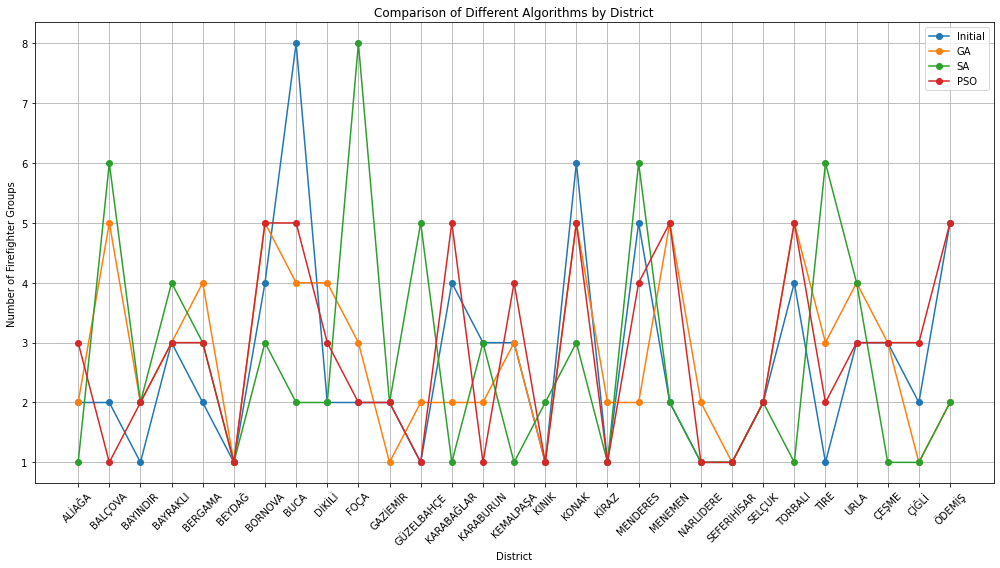

In [74]:
# Extract data for the graph
districts_list = districts
initial = data_merged['ITFAIYE_GRUP_SAYISI'].tolist()
ga = best_individual
sa = optimized_stations
pso = gbest.astype(int)

# Plot the graph
plt.figure(figsize=(14, 8))

# Plot each line
plt.plot(districts_list, initial, label='Initial', marker='o')
plt.plot(districts_list, ga, label='GA', marker='o')
plt.plot(districts_list, sa, label='SA', marker='o')
plt.plot(districts_list, pso, label='PSO', marker='o')

# Add title and labels
plt.title('Comparison of Different Algorithms by District')
plt.xlabel('District')
plt.ylabel('Number of Firefighter Groups')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()